## PyTorch: Sequential Network

In [13]:
import torch
import torch.nn as nn
from torch.optim import SGD
import numpy as np
import matplotlib.pyplot as plt
import time

In [14]:
#Function from the last document

x = torch.tensor([[6,2],[5,2],[1,3],[7,6]]).float()
y = torch.tensor([1,5,2,5]).float()

class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.Matrix1 = nn.Linear(2,8,bias=False)
        self.Matrix2 = nn.Linear(8,1,bias=False)
    def forward(self,x):
        x = self.Matrix1(x)
        x = self.Matrix2(x)
        return x.squeeze()
    
f = MyNeuralNet()
opt = SGD(f.parameters(), lr=0.001)
L = nn.MSELoss()

# Train model
losses = []
for _ in range(50):
    opt.zero_grad() # flush previous epoch's gradient
    loss_value = L(f(x), y) #compute loss
    loss_value.backward() # compute gradient
    opt.step() # Perform iteration using gradient above
    losses.append(loss_value.item())

In [15]:
y, f(x)

(tensor([1., 5., 2., 5.]),
 tensor([3.3759, 2.8806, 1.1016, 4.6796], grad_fn=<SqueezeBackward0>))

This simple network isn' very accurate, this is because of a lack of free parameters. With the two previously defined matrices we end up with only 2 free parameters. We had:  
$$
f(x) = A_2 A_1 x
$$
Where this product results in a $2\times{1}$ matrix.

Now we want to consider the following model:  
$$
f_2 (x) = A_2 R(A_1 x)
$$
Where:  
$$
R(x) = 
\begin{cases}
    x \quad if \ \ x > 0 \\
    0 \quad if \ \ x \leq 0
\end{cases}
$$

$R$ is just the identity function if $x > 0$

In [16]:
#Example
x = torch.tensor([[4,6,2,-1,6,2,5],[1,6,2,-6,5,-3,5]])
x

tensor([[ 4,  6,  2, -1,  6,  2,  5],
        [ 1,  6,  2, -6,  5, -3,  5]])

In [17]:
#R function
R = nn.ReLU()
R(x)

tensor([[4, 6, 2, 0, 6, 2, 5],
        [1, 6, 2, 0, 5, 0, 5]])

In [18]:
#Another example
x = torch.linspace(-3, 3, 100)
y = x

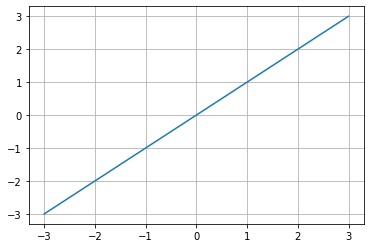

In [19]:
plt.plot(x.numpy(),y.numpy())
plt.grid()

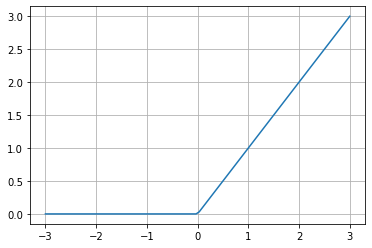

In [20]:
y = R(x)
plt.plot(x.numpy(),y.numpy())
plt.grid()

#### Neural Network with this new model

In [21]:
class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.Matrix1 = nn.Linear(2,8,bias=False)
        self.Matrix2 = nn.Linear(8,1,bias=False)
        self.R = nn.ReLU()
    def forward(self,x):
        x = self.R(self.Matrix1(x))
        x = self.Matrix2(x)
        return x.squeeze()

Let's build a function to do the training

In [22]:
def train_model(x, y, f, n_epochs = 100, ell = 0.001):
    opt = SGD(f.parameters(), lr = ell)
    L = nn.MSELoss()
    
    #Train model
    losses = []
    for _ in range(n_epochs):
        opt.zero_grad() #flush previous epoch's gradient
        loss_value = L(f(x), y) #compute loss
        loss_value.backward() #compute gradient
        opt.step() #perform iteration using gradient above
        losses.append(loss_value.item())
    return f, losses

In [23]:
x = torch.tensor([[6,2],[5,2],[1,3],[7,6]]).float()
y = torch.tensor([1,5,2,5]).float()
f2 = MyNeuralNet()

#Train model
f2, losses2 = train_model(x, y, f2, n_epochs=10000)

In [24]:
y, f2(x)

(tensor([1., 5., 2., 5.]),
 tensor([2.8052, 2.5154, 1.9967, 5.2280], grad_fn=<SqueezeBackward0>))

Now that we have the non-linear operator $R$ we can add more parameter (larger matrices) without all these elements collapsing

In [28]:
class MyNeuralNet3(nn.Module):
    def __init__(self):
        super().__init__()
        self.Matrix1 = nn.Linear(2,80,bias=False)
        self.Matrix2 = nn.Linear(80,1,bias=False)
        self.R = nn.ReLU()
    def forward(self,x):
        x = self.R(self.Matrix1(x))
        x = self.Matrix2(x)
        return x.squeeze()

In [30]:
x = torch.tensor([[6,2],[5,2],[1,3],[7,6]]).float()
y = torch.tensor([1,5,2,5]).float()
f3 = MyNeuralNet3()
x = torch.tensor([[6,2],[5,2],[1,3],[7,6]]).float()
y = torch.tensor([1,5,2,5]).float() = torch.tensor([[6,2],[5,2],[1,3],[7,6]]).float()
y = torch.tensor([1,5,2,5]).float()
f3, losses3 = train_model(x, y, f3, n_epochs=5000)

SyntaxError: cannot assign to function call (414162440.py, line 5)

In [27]:
y, f3(x)

NameError: name 'f3' is not defined

#### Bias

To make the network even better, we can add some extra parameters in the form of a bias vector.  
The model would now look as following:  
$$
f(x) = A_2 R(A_1 x + b_1) + b_2
$$

In [60]:
class MyNeuralNet4(nn.Module):
    def __init__(self):
        super().__init__()
        self.Matrix1 = nn.Linear(2,80)
        self.Matrix2 = nn.Linear(80,1)
        self.R = nn.ReLU()
    def forward(self,x):
        x = self.R(self.Matrix1(x))
        x = self.Matrix2(x)
        return x.squeeze()

In [61]:
x = torch.tensor([[6,2],[5,2],[1,3],[7,6]]).float()
y = torch.tensor([1,5,2,5]).float()
f4 = MyNeuralNet4()

f4, losses4 = train_model(x, y, f4, n_epochs=5000)

In [63]:
y, f4(x)

(tensor([1., 5., 2., 5.]),
 tensor([1.4323, 4.4477, 2.0328, 5.0112], grad_fn=<SqueezeBackward0>))

Our final iteration of the model is as following:  
$$
f(x) = A_3 R(A_2 R(A_1 x + b_1) + b_2) + b_3
$$  
We just added another parameter matrix

In [64]:
class MyNeuralNet5(nn.Module):
    def __init__(self):
        super().__init__()
        self.Matrix1 = nn.Linear(2,80)
        self.Matrix2 = nn.Linear(80,80)
        self.Matrix3 = nn.Linear(80,1)
        self.R = nn.ReLU()
    def forward(self,x):
        x = self.R(self.Matrix1(x))
        x = self.R(self.Matrix2(x))
        x = self.Matrix3(x)
        return x.squeeze()

In [65]:
x = torch.tensor([[6,2],[5,2],[1,3],[7,6]]).float()
y = torch.tensor([1,5,2,5]).float()
f5 = MyNeuralNet5()

f5, losses5 = train_model(x, y, f4, n_epochs=5000)

In [66]:
y, f5(x)

(tensor([1., 5., 2., 5.]),
 tensor([1.0126, 4.9837, 2.0008, 5.0004], grad_fn=<SqueezeBackward0>))

### The Sequential Neural Network

The general form of a sequential neural network is expressed as:  
$$
f(x) = \kappa_{i = 1}^n R_i(A_i x + b_i)
$$
Where $\kappa_{i = 1}^n f_i(x) = f_n \cdot f_{n-1} \cdot ... \cdot f_1 (x)$